## El primer paso del proyecto es importar el/los datasets que nos ayudaran a la elaboracion del proyecto

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./oro?/triplets_file.csv")
df_songs = pd.read_csv("./oro?/song_data.csv")

In [3]:
df.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [4]:
df_songs.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


## Ahora indagemos los datos del dataframe priincipal (df) para darnos una idea con lo que estaremos trabajando

In [5]:
df.user_id.nunique()

76353

In [6]:
respuestas_promedio = df.shape[0] / df.user_id.nunique()
respuestas_promedio

26.194124657839247

#### Vemos que en el dataframe tenemos 76353 usuarios que han respondido, los cuales escuchan en promedio 26 canciones diferentes aproximadamente

In [7]:
df.sort_values(by="listen_count").head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1151076,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOJJYOM12A8C142CD9,1
1151075,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOJGZFQ12AF72A41B2,1
1151074,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOJGSFH12AB017EFC2,1
1151072,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOIPFGR12B0B8063CB,1


In [8]:
df.sort_values(by="listen_count").tail()

,user_id,song_id,listen_count
1875121,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOBONKR12A58A7A7E0,683
31179,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,SOZQSVB12A8C13C271,796
1586780,5ea608df0357ec4fda191cb9316fe8e6e65e3777,SOKOSPK12A8C13C088,879
1048310,50996bbabb6f7857bf0c8019435b5246a0e45cfd,SOUAGPQ12A8AE47B3A,920
1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213


#### Vemos que hay usuarios que han oido una cancion desde 1 vez hasta usuarios que han escuchado una cancion mas de 2000 veces

In [9]:
df.isnull().sum()

user_id         0
song_id         0
listen_count    0
dtype: int64

#### Parecen muy limpios los datos

In [10]:
c = df['listen_count'].value_counts()
c.head()

listen_count
1    1138433
2     313043
3     142933
5      93136
4      82569
Name: count, dtype: int64

In [11]:
df['listen_count'].nunique()

295

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

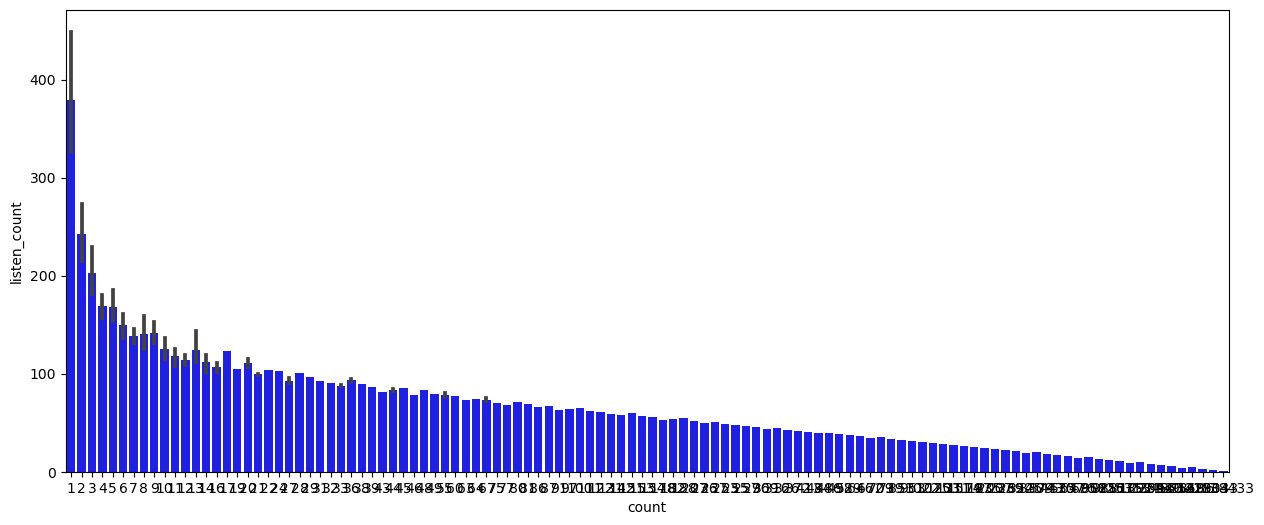

In [13]:
plt.figure(figsize=(15, 6))
sns.barplot(x=c,y=c.index, color='blue')
plt.show()

#### Aqui tenemos un problema, pues tenemos una gran cantidad de diferentes escuchadas, casi 300, por lo que para hacerlo mas general y hacer recomendaciones mas generales, haremos rangos de estas escuchadas por cancion.

In [14]:
c.sum()

2000000

In [15]:
#bins = [0, 3, 10, 20, 30, 40, 50, 100, 200, 500, float('inf')]
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]

labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df['calificacion'] = pd.cut(df['listen_count'], bins=bins, labels=labels, right=False)

df.head()

,user_id,song_id,listen_count,calificacion
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,2
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,3
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,2
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,2


In [16]:
#rectificamos que la nueva columan sea de numeros

df['calificacion'] = df['calificacion'].astype(int)

type(df['calificacion'][0])

numpy.int64

In [17]:
d = df['calificacion'].value_counts()
d.head()

calificacion
2     1138433
3      313043
4      142933
10     130790
6       93136
Name: count, dtype: int64

In [18]:
df['calificacion'].nunique()

9

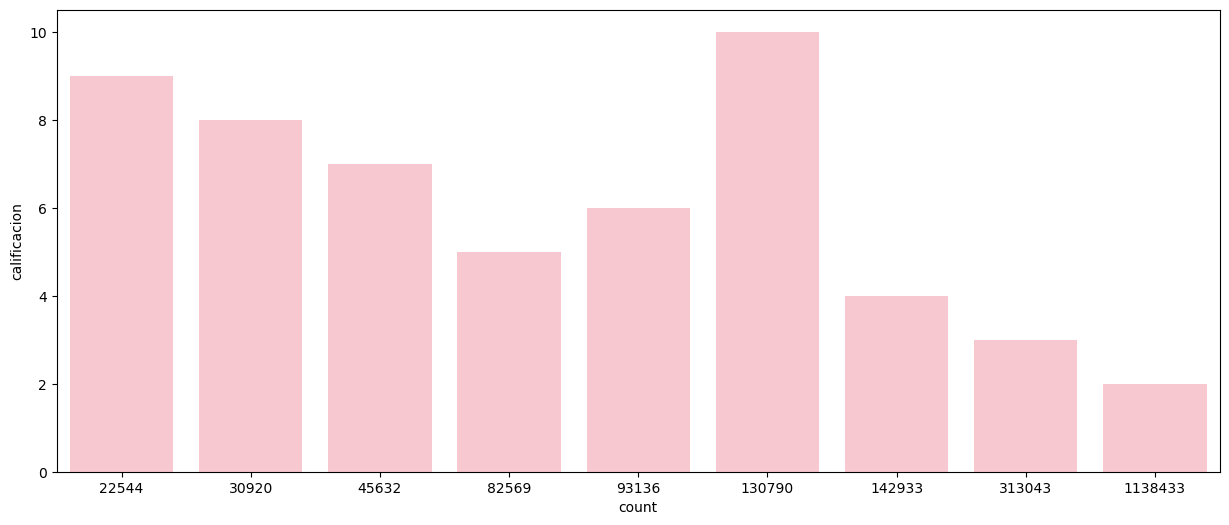

In [19]:
plt.figure(figsize=(15, 6))
sns.barplot(x=d,y=d.index, color='pink')
plt.show()

#### Por ultimo eliminamos la columna 'listen_count' pues ya no nos importa

In [20]:
df = df.drop('listen_count', axis=1)
df.head()

,user_id,song_id,calificacion
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,2
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,3
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,2
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,2


### Ahora toca dividir nuestros datos, para poder entrenar, testear y validar nuestro modelo

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_train, df_val = train_test_split(df, test_size = 0.2, random_state=1)
print(df_train.shape, df_val.shape)

(1600000, 3) (400000, 3)


In [23]:
df_train.head()

,user_id,song_id,calificacion
1952144,2ce5b56b6c651accc947db94e5f5b37b51a8b4dc,SOXHIDK12A58A7CFB3,2
767002,a540373b4f88f7a34203ce1c8bbfa0bb56679aaf,SOITJIQ12A8C13A291,2
797412,c6c9c2f0cb0174cc67f4bd803431e709438ba360,SOUSOKG12A58A7AC15,5
1235336,2c460774b978af80929ace6109bbf405c9c872bc,SOWUEQA12A8151BA81,2
1955142,2869bf0c721e75cc0871adb749916085e3ef23f0,SOSHJIH12AF72A1D72,2


In [24]:
df_train[["user_id","song_id","calificacion"]]

,user_id,song_id,calificacion
1952144,2ce5b56b6c651accc947db94e5f5b37b51a8b4dc,SOXHIDK12A58A7CFB3,2
767002,a540373b4f88f7a34203ce1c8bbfa0bb56679aaf,SOITJIQ12A8C13A291,2
797412,c6c9c2f0cb0174cc67f4bd803431e709438ba360,SOUSOKG12A58A7AC15,5
1235336,2c460774b978af80929ace6109bbf405c9c872bc,SOWUEQA12A8151BA81,2
1955142,2869bf0c721e75cc0871adb749916085e3ef23f0,SOSHJIH12AF72A1D72,2
...,...,...,...
491263,e6f1dd0b1cb86f83aa056289ef6b83c059064773,SOLQSWM12A6D4FA60D,2
1840200,fe75beb1e8dcba3145048acc92d3f5a94ac0ae5b,SOSJZID12A8C13E802,3
470924,c2ec3f7c38ae13c8819c978d0b33b3c406f11c24,SORKVID12A6D4FC6D2,2
491755,db7c0b803e0a137e8f32ff52c44571960fdc730c,SOOXLKF12A6D4F594A,2


#### Ya con esta matriz, es hora de descomponerla mediante SVD en otras 3, las cuales usaremos para nuestro sistema de recomendacion, una para los usuarios, una diagonal y otra para las canciones

In [101]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate

reader = Reader(line_format='user item rating', rating_scale=(1, 10))

In [102]:
dataTrain = Dataset.load_from_df(df_train[["user_id","song_id","calificacion"]], reader=reader)
dataTrain = dataTrain.build_full_trainset()

dataTest = Dataset.load_from_df(df_val[["user_id","song_id","calificacion"]], reader=reader)
dataTest = dataTest.construct_testset(dataTest.raw_ratings)

In [103]:
algo = SVD()

algo.fit(dataTrain)

predictions = algo.test(dataTest)

accuracy.rmse(predictions)

RMSE: 2.0844


2.0844480920861956

#### otra manera de ver como se comporta el algoritmo
cross_validate(algo, dataTrain, measures=['RMSE'], cv=5, verbose=True)

In [104]:
df_val.head()

,user_id,song_id,calificacion
1806398,f74715141f556a690b554e4bda4ec441f976c97d,SOJOIKI12AB0187525,2
422849,36f4f0163fe74c1f88c49b5c79ca00f9fa304d13,SOVBQOM12A8C137B16,2
1772714,a187486100bafebe5264a216d6dfc1646dbd2f03,SOYFNQM12A8C14264B,6
828325,775fb230d87357dbab455808c4ff9831fb65ad46,SOABNPW12A6D4FC9B5,2
659831,76bc893a4163b46d5474d501e1d11456546b50d2,SONUHDN12AB01800D7,2


#### Probemos una prediccion

In [105]:
user_id = "76bc893a4163b46d5474d501e1d11456546b50d2"
song_id = "SONUHDN12AB01800D7"

In [106]:
pred = algo.predict(user_id, song_id, r_ui=4, verbose=True)
x = [pred.iid, pred.est]
print(f"La calificacion estimada del usuario es {pred[3]}")

user: 76bc893a4163b46d5474d501e1d11456546b50d2 item: SONUHDN12AB01800D7 r_ui = 4.00   est = 3.69   {'was_impossible': False}
La calificacion estimada del usuario es 3.6916251311605293


### Ahora hagamos el sistema de recomendacion, en el que le damos un usuario y nos recomienda las 10 mejores canciones para el/ella/eso/helicopterodecombate/elle

In [107]:
canciones = df["song_id"].unique()
canciones.size

10000

In [111]:
def musicRecommendationSystem(user):
    
    #Obtener los ids de las canciones recomendadas
    idsRecomendadas = []
    for i in range(0,canciones.size):
        pred = algo.predict(user, canciones[i], r_ui=4, verbose=False)
        idsRecomendadas.append([pred.iid, pred.est])
    myvar = pd.DataFrame(idsRecomendadas, columns=['song_id', 'calif']).sort_values(by=['calif'], ascending=False)
    recomendadas = myvar.head(10)
    
    #De los ids, obtener el nombre, album y artista
    song_ids = recomendadas['song_id']
    filtered_songs = df_songs[df_songs['song_id'].isin(song_ids)][['title', 'release', 'artist_name']]
    

    return filtered_songs

In [112]:
userPrueba = 'c6c9c2f0cb0174cc67f4bd803431e709438ba360'

musicRecommendationSystem(userPrueba)

,title,release,artist_name
160646,Show Me Love,The Annual 2009,Mobin Master Feat. Robin S.
222242,16 Candles,16 Candles,The Crests
283457,Quiero Quererte Querer,Una Noche Con Arte,El Arrebato
335297,Right Here Waiting (Single Edit),Playlist: Ballads,Richard Marx
528866,Say Yeah [Radio Edit],Say Yeah,Wiz Khalifa
541316,Colors Of The Wind,The Magic Of Disney,Vanessa Williams
626029,Here I Stand,Just To Let You Know&,Bitty McLean
629260,Satisfaction,Hypnotica,Benny Benassi Presents The Biz
798640,Glad All Over,B-Sides & Rarities,Terrorvision
830707,Numb (Album Version),The Sickness,Disturbed


In [113]:
userPrueba1 = '36f4f0163fe74c1f88c49b5c79ca00f9fa304d13'

musicRecommendationSystem(userPrueba1)

,title,release,artist_name
59444,Decades Of Despair,Aren´t You Dead Yet?,Carnal Forge
120934,Gestern_Morgen,Happy In Grey,Damero feat. Nevis Peak
123377,Clara meets Slope - Hard To Say,All I Can Provide,Clara Hill
161905,Tennessee (Pirate Radio Mix),Extended Revolution,ARRESTED DEVELOPMENT
195333,In League With Satan,Works Of Carnage,Krisiun
396937,Canción Para Luchar,Bandidos Rurales,León Gieco
536341,Brother,Out Of My Hands,Keisha White
892984,Cold Blooded (Acid Cleanse),Machine Punk Music,The fFormula
894992,221,Spun,keller williams
917954,Greece 2000,Greece 2000,Three Drives
